In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('C:/Users/hp/Documents/phyton/linear regression case study in python (1).csv')

In [4]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


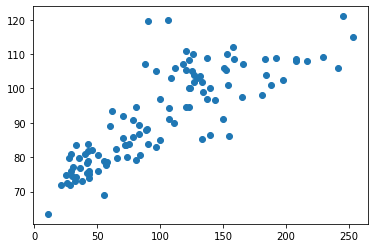

In [28]:
plt.scatter(data.AT,data.Waist)

In [32]:
y=data['AT']
x=data['Waist']
model_1=smf.ols('AT~Waist',data=data).fit()

In [34]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.62e-27
Time:                        12:44:03   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model_1.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

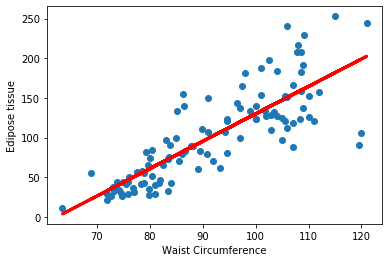

In [38]:
plt.scatter(x,y)
yh=-215.981488+3.458859*x
plt.plot(x,yh,c='r',lw=3,label='Regression line')
plt.xlabel('Waist Circumference')
plt.ylabel('Edipose tissue')
plt.show()

In [41]:
pred=model_1.predict(data)

In [42]:
error_1=data.AT-pred
error_1

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [43]:
error_1.mean()


-6.818602767018943e-14

In [44]:
def RMSE(i):
    temp = np.sqrt(np.mean(i**2))
    return temp

RMSE(error_1)



32.76017749575514

In [45]:
model1_RMSE = RMSE(error_1)

In [49]:

model_2=smf.ols('np.log(AT)~np.log(Waist)',data=data).fit()

In [50]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     296.5
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.29e-32
Time:                        13:03:27   Log-Likelihood:                -34.704
No. Observations:                 109   AIC:                             73.41
Df Residuals:                     107   BIC:                             78.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -12.4607      0.982    -12.689      0.000     -14.407     -10.514
np.log(Waist)     3.7476      0.218     17.220      0.000       3.316       4.179
==============================================================================
Omnibus:                        1.012   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.847
Skew:                          -0.216   Prob(JB):                        0.655
Kurtosis:                       2.988   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model_2.params

Intercept       -12.460697
np.log(Waist)     3.747567
dtype: float64

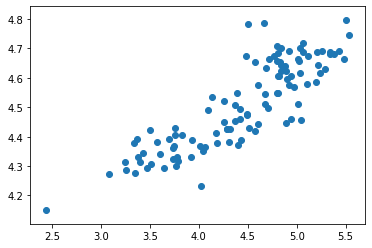

In [58]:
y1=np.log(data['AT'])
x2=np.log(data['Waist'])
plt.scatter(y1,x2)


In [59]:
y1=-12.460697+3.477567*x2
y_2=np.exp(y_1)
y_2


0      12.705639
1      11.479417
2      17.382643
3      19.023873
4      12.646627
         ...    
104    35.077738
105    27.465243
106    37.193365
107    45.536153
108    46.422801
Name: Waist, Length: 109, dtype: float64

In [64]:
pred_2_log=model_2.predict(data)
pred_2_log

0      3.706864
1      3.597494
2      4.044625
3      4.141852
4      3.701847
         ...   
104    4.801230
105    4.537590
106    4.864341
107    5.082430
108    5.103211
Length: 109, dtype: float64

Text(0, 0.5, 'edipose tissue')

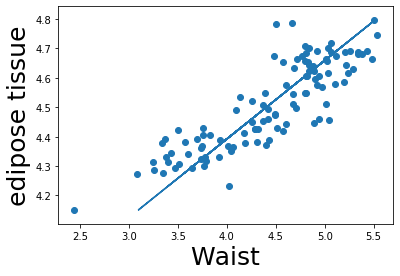

In [65]:
y1=np.log(data['AT'])
x2=np.log(data['Waist'])
plt.scatter(y1,x2)
plt.plot(pred_2_log,x2)
plt.xlabel('Waist', fontsize=25)
plt.ylabel('edipose tissue', fontsize=25)


In [67]:
pred_2=np.exp(pred_2_log)
pred_2

0       40.725892
1       36.506633
2       57.089765
3       62.919255
4       40.522089
          ...    
104    121.659994
105     93.465323
106    129.585489
107    161.165144
108    164.549422
Length: 109, dtype: float64

In [68]:
error_2=data.AT-pred_2
error_2

0     -15.005892
1     -10.616633
2     -14.489765
3     -20.119255
4     -10.682089
         ...    
104     2.340006
105   -31.265323
106     3.414511
107    46.834856
108    43.450578
Length: 109, dtype: float64

In [69]:
error_2.mean()

3.608740339594846

In [70]:
RMSE(error_2)

36.17799436040532